![Python Logo](./img/python-logo-master-v3-TM-flattened_small.png)

# Financial Programming - IÉSEG, Lille - MBD 2019-2020
## Group Project - Financial Data

In [1]:
first_name = ''
last_name = ''

### Data Exploration

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Input data**

In [3]:
# Each record describes static characteristics of an account
account = pd.read_csv('./data_berka/account.asc', sep=';')
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [4]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
account_id     4500 non-null int64
district_id    4500 non-null int64
frequency      4500 non-null object
date           4500 non-null int64
dtypes: int64(3), object(1)
memory usage: 140.7+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x172bd7b57b8>,
 'caps': [<matplotlib.lines.Line2D at 0x172bdbd7fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x172bdbd77b8>],
 'medians': [<matplotlib.lines.Line2D at 0x172bdbf6908>],
 'fliers': [<matplotlib.lines.Line2D at 0x172bdbf6c50>],
 'means': []}

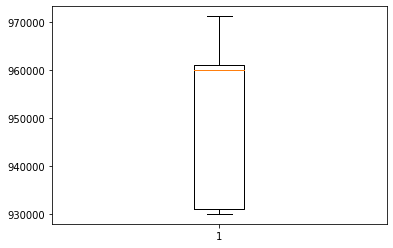

In [5]:
plt.boxplot(account["date"])

In [6]:
# Each record describes a credit card issued to an account
card = pd.read_csv('./data_berka/card.asc', sep=';')
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [7]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
card_id    892 non-null int64
disp_id    892 non-null int64
type       892 non-null object
issued     892 non-null object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


In [8]:
# Each record describes characteristics of a client
client = pd.read_csv('./data_berka/client.asc', sep=';')
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [9]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
client_id       5369 non-null int64
birth_number    5369 non-null int64
district_id     5369 non-null int64
dtypes: int64(3)
memory usage: 125.9 KB


In [10]:
client['birth_year'] = client['birth_number'].transform(lambda bn: int('19' + str(bn)[:2]))
client['birth_day'] = client['birth_number'].astype(str).str[-2:].astype(int)

# Age group
client['age'] = 1999 - client['birth_year']
client['age_group'] = client['age'] // 10 * 10
client.head()


,client_id,birth_number,district_id,birth_year,birth_day,age,age_group
0,1,706213,18,1970,13,29,20
1,2,450204,1,1945,4,54,50
2,3,406009,1,1940,9,59,50
3,4,561201,5,1956,1,43,40
4,5,605703,5,1960,3,39,30


In [11]:
client.info()
client.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 7 columns):
client_id       5369 non-null int64
birth_number    5369 non-null int64
district_id     5369 non-null int64
birth_year      5369 non-null int64
birth_day       5369 non-null int32
age             5369 non-null int64
age_group       5369 non-null int64
dtypes: int32(1), int64(6)
memory usage: 272.7 KB


(5369, 7)

In [12]:
# Each record relates together a client with an account i.e. this relation describes the rights
# of clients to operate accounts
disp = pd.read_csv('./data_berka/disp.asc', sep=';')
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [13]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
disp_id       5369 non-null int64
client_id     5369 non-null int64
account_id    5369 non-null int64
type          5369 non-null object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [14]:
# Each record describes characteristics of a payment order
order = pd.read_csv('./data_berka/order.asc', sep=';')
order.head(7)


,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,
5,29406,3,AB,59972357,3539.0,POJISTNE
6,29407,4,UV,26693541,2078.0,SIPO


In [15]:
order.info()
len(order[order["k_symbol"]==" "])
order["k_symbol"] = order["k_symbol"].replace(' ', "UNKNOWN")
order.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
order_id      6471 non-null int64
account_id    6471 non-null int64
bank_to       6471 non-null object
account_to    6471 non-null int64
amount        6471 non-null float64
k_symbol      6471 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 303.4+ KB


(6471, 6)

In [16]:
# Each record describes one transaction on an account
trans = pd.read_csv('./data_berka/trans.asc', sep=';', low_memory=False)
trans.head(20)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
5,771035,2632,930102,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN
6,452728,1539,930103,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
7,725751,2484,930103,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN
8,497211,1695,930103,PRIJEM,VKLAD,200.0,200.0,NaN,NaN,NaN
9,232960,793,930103,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN


In [39]:
trans['k_symbol']=trans['k_symbol'].replace(np.nan, 'Unknown')


In [40]:
trans['bank']=trans['bank'].replace(np.nan, 'Unknown')


In [41]:
trans['operation']=trans['operation'].replace(np.nan, 'Unknown')

In [20]:
trans["account"] = trans["account"].replace(np.nan, 0.0)
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,Unknown,Unknown,0.0
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Unknown,Unknown,0.0
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Unknown,Unknown,0.0
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,Unknown,Unknown,0.0
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,Unknown,Unknown,0.0
5,771035,2632,930102,PRIJEM,VKLAD,1100.0,1100.0,Unknown,Unknown,0.0
6,452728,1539,930103,PRIJEM,VKLAD,600.0,600.0,Unknown,Unknown,0.0
7,725751,2484,930103,PRIJEM,VKLAD,1100.0,1100.0,Unknown,Unknown,0.0
8,497211,1695,930103,PRIJEM,VKLAD,200.0,200.0,Unknown,Unknown,0.0
9,232960,793,930103,PRIJEM,VKLAD,800.0,800.0,Unknown,Unknown,0.0


In [21]:

trans.head(n=20)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,Unknown,Unknown,0.0
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Unknown,Unknown,0.0
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Unknown,Unknown,0.0
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,Unknown,Unknown,0.0
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,Unknown,Unknown,0.0
5,771035,2632,930102,PRIJEM,VKLAD,1100.0,1100.0,Unknown,Unknown,0.0
6,452728,1539,930103,PRIJEM,VKLAD,600.0,600.0,Unknown,Unknown,0.0
7,725751,2484,930103,PRIJEM,VKLAD,1100.0,1100.0,Unknown,Unknown,0.0
8,497211,1695,930103,PRIJEM,VKLAD,200.0,200.0,Unknown,Unknown,0.0
9,232960,793,930103,PRIJEM,VKLAD,800.0,800.0,Unknown,Unknown,0.0


In [22]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
trans_id      1056320 non-null int64
account_id    1056320 non-null int64
date          1056320 non-null int64
type          1056320 non-null object
operation     1056320 non-null object
amount        1056320 non-null float64
balance       1056320 non-null float64
k_symbol      1056320 non-null object
bank          1056320 non-null object
account       1056320 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [23]:
# Each record describes a loan granted for a given account
loan = pd.read_csv('./data_berka/loan.asc', sep=';')
loan.head()
loan.shape


(682, 7)

In [24]:
# Each record describes demographic characteristics of a district.
district = pd.read_csv('./data_berka/district.asc', sep=';')

district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [25]:
district.rename(columns={"A1":"district_id"}, inplace=True)
district

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
5,6,Kutna Hora,central Bohemia,77963,60,23,4,2,4,51.5,8546,2.95,4.02,126,2640,3120
6,7,Melnik,central Bohemia,94725,38,28,1,3,6,63.4,9920,2.26,2.87,130,4289,4846
7,8,Mlada Boleslav,central Bohemia,112065,95,19,7,1,8,69.4,11277,1.25,1.44,127,5179,4987
8,9,Nymburk,central Bohemia,81344,61,23,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
9,10,Praha - vychod,central Bohemia,92084,55,29,4,3,5,46.7,10124,0.56,0.54,141,3810,4316


In [26]:
joinlac = pd.merge(account, loan, on='account_id', how='left').sort_values(by='account_id')
print(joinlac)

      account_id  district_id         frequency  date_x  loan_id    date_y  \
1720           1           18  POPLATEK MESICNE  950324      NaN       NaN   
182            2            1  POPLATEK MESICNE  930226   4959.0  940105.0   
4072           3            5  POPLATEK MESICNE  970707      NaN       NaN   
2426           4           12  POPLATEK MESICNE  960221      NaN       NaN   
3976           5           15  POPLATEK MESICNE  970530      NaN       NaN   
1465           6           51  POPLATEK MESICNE  940927      NaN       NaN   
3462           7           60  POPLATEK MESICNE  961124      NaN       NaN   
2047           8           57  POPLATEK MESICNE  950921      NaN       NaN   
86             9           70  POPLATEK MESICNE  930127      NaN       NaN   
3130          10           54  POPLATEK MESICNE  960828      NaN       NaN   
2080          11           76  POPLATEK MESICNE  951010      NaN       NaN   
3852          12           21  POPLATEK MESICNE  970415      NaN

In [27]:
joinlacx = pd.merge(joinlac, district, on='district_id', how='left').sort_values(by='account_id')
print(joinlacx)

      account_id  district_id         frequency  date_x  loan_id    date_y  \
0              1           18  POPLATEK MESICNE  950324      NaN       NaN   
1              2            1  POPLATEK MESICNE  930226   4959.0  940105.0   
2              3            5  POPLATEK MESICNE  970707      NaN       NaN   
3              4           12  POPLATEK MESICNE  960221      NaN       NaN   
4              5           15  POPLATEK MESICNE  970530      NaN       NaN   
5              6           51  POPLATEK MESICNE  940927      NaN       NaN   
6              7           60  POPLATEK MESICNE  961124      NaN       NaN   
7              8           57  POPLATEK MESICNE  950921      NaN       NaN   
8              9           70  POPLATEK MESICNE  930127      NaN       NaN   
9             10           54  POPLATEK MESICNE  960828      NaN       NaN   
10            11           76  POPLATEK MESICNE  951010      NaN       NaN   
11            12           21  POPLATEK MESICNE  970415      NaN

In [28]:
joinlacxx = pd.merge(joinlacx, district, on='district_id', how='left').sort_values(by='account_id')
print(joinlacx)

      account_id  district_id         frequency  date_x  loan_id    date_y  \
0              1           18  POPLATEK MESICNE  950324      NaN       NaN   
1              2            1  POPLATEK MESICNE  930226   4959.0  940105.0   
2              3            5  POPLATEK MESICNE  970707      NaN       NaN   
3              4           12  POPLATEK MESICNE  960221      NaN       NaN   
4              5           15  POPLATEK MESICNE  970530      NaN       NaN   
5              6           51  POPLATEK MESICNE  940927      NaN       NaN   
6              7           60  POPLATEK MESICNE  961124      NaN       NaN   
7              8           57  POPLATEK MESICNE  950921      NaN       NaN   
8              9           70  POPLATEK MESICNE  930127      NaN       NaN   
9             10           54  POPLATEK MESICNE  960828      NaN       NaN   
10            11           76  POPLATEK MESICNE  951010      NaN       NaN   
11            12           21  POPLATEK MESICNE  970415      NaN

In [29]:
joinorder = pd.merge(order, joinlacxx, on='account_id', how='left').sort_values(by='account_id')
print(joinorder)

      order_id  account_id bank_to  account_to  amount_x  k_symbol  \
0        29401           1      YZ    87144583    2452.0      SIPO   
1        29402           2      ST    89597016    3372.7      UVER   
2        29403           2      QR    13943797    7266.0      SIPO   
3        29404           3      WX    83084338    1135.0      SIPO   
4        29405           3      CD    24485939     327.0   UNKNOWN   
5        29406           3      AB    59972357    3539.0  POJISTNE   
6        29407           4      UV    26693541    2078.0      SIPO   
7        29408           4      UV     5848086    1285.0      SIPO   
8        29409           5      GH    37390208    2668.0      SIPO   
9        29410           6      AB    44486999    3954.0      SIPO   
10       29411           7      IJ    34452903    4880.0      SIPO   
12       29413           8      IJ    93210345    6712.0   UNKNOWN   
11       29412           8      UV    12510681    2612.0      SIPO   
13       29414      

In [32]:
jointrans = pd.merge(joinorder, trans, on='account_id', how='left').sort_values(by='account_id')
print(jointrans)

         order_id  account_id bank_to  account_to  amount_x k_symbol_x  \
0           29401           1      YZ    87144583    2452.0       SIPO   
152         29401           1      YZ    87144583    2452.0       SIPO   
153         29401           1      YZ    87144583    2452.0       SIPO   
154         29401           1      YZ    87144583    2452.0       SIPO   
155         29401           1      YZ    87144583    2452.0       SIPO   
156         29401           1      YZ    87144583    2452.0       SIPO   
157         29401           1      YZ    87144583    2452.0       SIPO   
158         29401           1      YZ    87144583    2452.0       SIPO   
159         29401           1      YZ    87144583    2452.0       SIPO   
160         29401           1      YZ    87144583    2452.0       SIPO   
161         29401           1      YZ    87144583    2452.0       SIPO   
162         29401           1      YZ    87144583    2452.0       SIPO   
163         29401           1      YZ 

In [34]:
client.shape

(5369, 7)

In [35]:
jointrans.shape

(1715140, 54)

In [ ]:
joinclient = pd.merge(jointrans, client, on='district_id', how='left').sort_values(by='account_id')
print(joinclient)

In [49]:
loan


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
5,6687,8261,930913,87840,24,3660.0,A
6,7284,11265,930915,52788,12,4399.0,A
7,6111,5428,930924,174744,24,7281.0,B
8,7235,10973,931013,154416,48,3217.0,A
9,5997,4894,931104,117024,24,4876.0,A


In [37]:
joinclient_district = pd.merge(client, district, on='district_id', how='left').sort_values(by='client_id')
print(joinclient_district)
print(client.shape)
print(district.shape)

      client_id  birth_number  district_id  birth_year  birth_day  age  \
0             1        706213           18        1970         13   29   
1             2        450204            1        1945          4   54   
2             3        406009            1        1940          9   59   
3             4        561201            5        1956          1   43   
4             5        605703            5        1960          3   39   
5             6        190922           12        1919         22   80   
6             7        290125           15        1929         25   70   
7             8        385221           51        1938         21   61   
8             9        351016           60        1935         16   64   
9            10        430501           57        1943          1   56   
10           11        505822           57        1950         22   49   
11           12        810220           40        1981         20   18   
12           13        745529         

In [42]:
joinclient_account = pd.merge(joinclient_district, account, on='district_id', how='left').sort_values(by='client_id')
print(joinclient_account)
print(client.shape)
print(district.shape)
print(account.shape)

        client_id  birth_number  district_id  birth_year  birth_day  age  \
0               1        706213           18        1970         13   29   
25              1        706213           18        1970         13   29   
26              1        706213           18        1970         13   29   
27              1        706213           18        1970         13   29   
28              1        706213           18        1970         13   29   
29              1        706213           18        1970         13   29   
30              1        706213           18        1970         13   29   
31              1        706213           18        1970         13   29   
32              1        706213           18        1970         13   29   
33              1        706213           18        1970         13   29   
24              1        706213           18        1970         13   29   
34              1        706213           18        1970         13   29   
36          

In [ ]:
# all the merge and other commands have been made to gain more insight into consumer behaviour.

In [50]:
# checking info about disp table
disp.info()
print(disp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
disp_id       5369 non-null int64
client_id     5369 non-null int64
account_id    5369 non-null int64
type          5369 non-null object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB
      disp_id  client_id  account_id       type
0           1          1           1      OWNER
1           2          2           2      OWNER
2           3          3           2  DISPONENT
3           4          4           3      OWNER
4           5          5           3  DISPONENT
5           6          6           4      OWNER
6           7          7           5      OWNER
7           8          8           6      OWNER
8           9          9           7      OWNER
9          10         10           8      OWNER
10         11         11           8  DISPONENT
11         12         12           9      OWNER
12         13         13          10      OWNER
13         14         14         

In [51]:
# checking info about card table
card.info()
print(card)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
card_id    892 non-null int64
disp_id    892 non-null int64
type       892 non-null object
issued     892 non-null object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB
     card_id  disp_id     type           issued
0       1005     9285  classic  931107 00:00:00
1        104      588  classic  940119 00:00:00
2        747     4915  classic  940205 00:00:00
3         70      439  classic  940208 00:00:00
4        577     3687  classic  940215 00:00:00
5        377     2429  classic  940303 00:00:00
6        721     4680   junior  940405 00:00:00
7        437     2762  classic  940601 00:00:00
8        188     1146  classic  940619 00:00:00
9         13       87  classic  940629 00:00:00
10       732     4763  classic  940721 00:00:00
11       181     1066  classic  940819 00:00:00
12       384     2475   junior  940915 00:00:00
13       309     1946  classic  940919 00:00:00
14 

In [74]:
# merging disp and card table
Disp_card = pd.merge(disp, card, on='disp_id', how='left')
print(Disp_card)

      disp_id  client_id  account_id     type_x  card_id   type_y  \
0           1          1           1      OWNER      NaN      NaN   
1           2          2           2      OWNER      NaN      NaN   
2           3          3           2  DISPONENT      NaN      NaN   
3           4          4           3      OWNER      NaN      NaN   
4           5          5           3  DISPONENT      NaN      NaN   
5           6          6           4      OWNER      NaN      NaN   
6           7          7           5      OWNER      NaN      NaN   
7           8          8           6      OWNER      NaN      NaN   
8           9          9           7      OWNER      1.0     gold   
9          10         10           8      OWNER      NaN      NaN   
10         11         11           8  DISPONENT      NaN      NaN   
11         12         12           9      OWNER      NaN      NaN   
12         13         13          10      OWNER      NaN      NaN   
13         14         14          

In [75]:
# grouping merged table on the basis of owner and disponent to check the user of credit card on the basis of owner and disponent
Disp_card.groupby(disp['type'])
print(Disp_card[['disp_id','account_id','type_x','card_id']])

      disp_id  account_id     type_x  card_id
0           1           1      OWNER      NaN
1           2           2      OWNER      NaN
2           3           2  DISPONENT      NaN
3           4           3      OWNER      NaN
4           5           3  DISPONENT      NaN
5           6           4      OWNER      NaN
6           7           5      OWNER      NaN
7           8           6      OWNER      NaN
8           9           7      OWNER      1.0
9          10           8      OWNER      NaN
10         11           8  DISPONENT      NaN
11         12           9      OWNER      NaN
12         13          10      OWNER      NaN
13         14          11      OWNER      NaN
14         15          12      OWNER      NaN
15         16          12  DISPONENT      NaN
16         17          13      OWNER      NaN
17         18          13  DISPONENT      NaN
18         19          14      OWNER      2.0
19         20          15      OWNER      NaN
20         21          16      OWN

In [76]:
# grouping them on the basis of type of card 
Disp_card.groupby(card['type'])
print(Disp_card[['disp_id','account_id','type_x','type_y','card_id']])

      disp_id  account_id     type_x   type_y  card_id
0           1           1      OWNER      NaN      NaN
1           2           2      OWNER      NaN      NaN
2           3           2  DISPONENT      NaN      NaN
3           4           3      OWNER      NaN      NaN
4           5           3  DISPONENT      NaN      NaN
5           6           4      OWNER      NaN      NaN
6           7           5      OWNER      NaN      NaN
7           8           6      OWNER      NaN      NaN
8           9           7      OWNER     gold      1.0
9          10           8      OWNER      NaN      NaN
10         11           8  DISPONENT      NaN      NaN
11         12           9      OWNER      NaN      NaN
12         13          10      OWNER      NaN      NaN
13         14          11      OWNER      NaN      NaN
14         15          12      OWNER      NaN      NaN
15         16          12  DISPONENT      NaN      NaN
16         17          13      OWNER      NaN      NaN
17        

In [79]:
#grouping the type of cards on the basis of issue date to check the client engagement
Disp_card.groupby(card['issued'])
print(Disp_card[['disp_id','account_id','issued','type_y']])

      disp_id  account_id           issued   type_y
0           1           1              NaN      NaN
1           2           2              NaN      NaN
2           3           2              NaN      NaN
3           4           3              NaN      NaN
4           5           3              NaN      NaN
5           6           4              NaN      NaN
6           7           5              NaN      NaN
7           8           6              NaN      NaN
8           9           7  981016 00:00:00     gold
9          10           8              NaN      NaN
10         11           8              NaN      NaN
11         12           9              NaN      NaN
12         13          10              NaN      NaN
13         14          11              NaN      NaN
14         15          12              NaN      NaN
15         16          12              NaN      NaN
16         17          13              NaN      NaN
17         18          13              NaN      NaN
18         1

In [65]:
# checking client table info
client.shape
print(client)

      client_id  birth_number  district_id  birth_year  birth_day  age  \
0             1        706213           18        1970         13   29   
1             2        450204            1        1945          4   54   
2             3        406009            1        1940          9   59   
3             4        561201            5        1956          1   43   
4             5        605703            5        1960          3   39   
5             6        190922           12        1919         22   80   
6             7        290125           15        1929         25   70   
7             8        385221           51        1938         21   61   
8             9        351016           60        1935         16   64   
9            10        430501           57        1943          1   56   
10           11        505822           57        1950         22   49   
11           12        810220           40        1981         20   18   
12           13        745529         

In [68]:
# joining disp and client table 
Disp_client = pd.merge(disp,client, on='client_id', how='left')
print(Disp_client)

      disp_id  client_id  account_id       type  birth_number  district_id  \
0           1          1           1      OWNER        706213           18   
1           2          2           2      OWNER        450204            1   
2           3          3           2  DISPONENT        406009            1   
3           4          4           3      OWNER        561201            5   
4           5          5           3  DISPONENT        605703            5   
5           6          6           4      OWNER        190922           12   
6           7          7           5      OWNER        290125           15   
7           8          8           6      OWNER        385221           51   
8           9          9           7      OWNER        351016           60   
9          10         10           8      OWNER        430501           57   
10         11         11           8  DISPONENT        505822           57   
11         12         12           9      OWNER        810220   

In [81]:
# grouping the client having bank accounts on the basis of district they belong to
Disp_client.groupby(client['district_id'])
print(Disp_client[['client_id','account_id','district_id']])

      client_id  account_id  district_id
0             1           1           18
1             2           2            1
2             3           2            1
3             4           3            5
4             5           3            5
5             6           4           12
6             7           5           15
7             8           6           51
8             9           7           60
9            10           8           57
10           11           8           57
11           12           9           40
12           13          10           54
13           14          11           76
14           15          12           21
15           16          12           21
16           17          13           76
17           18          13           76
18           19          14           47
19           20          15           46
20           21          16           12
21           22          17            1
22           23          17            1
23           24 

In [83]:
print(account)

      account_id  district_id           frequency    date
0            576           55    POPLATEK MESICNE  930101
1           3818           74    POPLATEK MESICNE  930101
2            704           55    POPLATEK MESICNE  930101
3           2378           16    POPLATEK MESICNE  930101
4           2632           24    POPLATEK MESICNE  930102
5           1972           77    POPLATEK MESICNE  930102
6           1539            1  POPLATEK PO OBRATU  930103
7            793           47    POPLATEK MESICNE  930103
8           2484           74    POPLATEK MESICNE  930103
9           1695           76    POPLATEK MESICNE  930103
10          1726           48    POPLATEK MESICNE  930103
11          2881           70    POPLATEK MESICNE  930104
12          2357           19    POPLATEK MESICNE  930104
13          2177           62    POPLATEK MESICNE  930104
14           485            6  POPLATEK PO OBRATU  930104
15           652           21    POPLATEK MESICNE  930105
16          96

In [84]:
print(district)

    district_id                   A2               A3       A4   A5  A6  A7  \
0             1          Hl.m. Praha           Prague  1204953    0   0   0   
1             2              Benesov  central Bohemia    88884   80  26   6   
2             3               Beroun  central Bohemia    75232   55  26   4   
3             4               Kladno  central Bohemia   149893   63  29   6   
4             5                Kolin  central Bohemia    95616   65  30   4   
5             6           Kutna Hora  central Bohemia    77963   60  23   4   
6             7               Melnik  central Bohemia    94725   38  28   1   
7             8       Mlada Boleslav  central Bohemia   112065   95  19   7   
8             9              Nymburk  central Bohemia    81344   61  23   4   
9            10       Praha - vychod  central Bohemia    92084   55  29   4   
10           11        Praha - zapad  central Bohemia    75637   35  36   9   
11           12              Pribram  central Bohemi

In [89]:
Acc_dist = pd.merge(district,account, on='district_id', how='left')
print(Acc_dist)

      district_id           A2             A3       A4  A5  A6  A7  A8  A9  \
0               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
1               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
2               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
3               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
4               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
5               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
6               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
7               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
8               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
9               1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
10              1  Hl.m. Praha         Prague  1204953   0   0   0   1   1   
11              1  Hl.m. Praha         Prague  1204953   0   0  

In [107]:
# group by on the basis of rural and urban inhabitants
Acc_dist.groupby(district['A10'])
print(Acc_dist[['district_id','account_id','A10','A4']])

      district_id  account_id    A10       A4
0               1        1539  100.0  1204953
1               1        1637  100.0  1204953
2               1         764  100.0  1204953
3               1        1730  100.0  1204953
4               1        2925  100.0  1204953
5               1        3909  100.0  1204953
6               1        4034  100.0  1204953
7               1         477  100.0  1204953
8               1        1750  100.0  1204953
9               1        2714  100.0  1204953
10              1        1805  100.0  1204953
11              1        1132  100.0  1204953
12              1         943  100.0  1204953
13              1        9265  100.0  1204953
14              1        8051  100.0  1204953
15              1        2884  100.0  1204953
16              1        1477  100.0  1204953
17              1       11013  100.0  1204953
18              1        3593  100.0  1204953
19              1         322  100.0  1204953
20              1        1678  100

In [106]:
# group by on the basis of entrepreneurs having bank accounts
Acc_dist.groupby(account['account_id'])
print(Acc_dist[['district_id','account_id','A14']])

      district_id  account_id  A14
0               1        1539  167
1               1        1637  167
2               1         764  167
3               1        1730  167
4               1        2925  167
5               1        3909  167
6               1        4034  167
7               1         477  167
8               1        1750  167
9               1        2714  167
10              1        1805  167
11              1        1132  167
12              1         943  167
13              1        9265  167
14              1        8051  167
15              1        2884  167
16              1        1477  167
17              1       11013  167
18              1        3593  167
19              1         322  167
20              1        1678  167
21              1         197  167
22              1           2  167
23              1        7401  167
24              1        2486  167
25              1         428  167
26              1        1575  167
27              1   

In [105]:
# group by no of entrepreneurs and how frequently they issue statements
Acc_dist.groupby(district['A14'])
print(Acc_dist[['district_id','account_id','A14','frequency']])

      district_id  account_id  A14           frequency
0               1        1539  167  POPLATEK PO OBRATU
1               1        1637  167    POPLATEK MESICNE
2               1         764  167    POPLATEK MESICNE
3               1        1730  167    POPLATEK MESICNE
4               1        2925  167    POPLATEK MESICNE
5               1        3909  167    POPLATEK MESICNE
6               1        4034  167    POPLATEK MESICNE
7               1         477  167    POPLATEK MESICNE
8               1        1750  167    POPLATEK MESICNE
9               1        2714  167    POPLATEK MESICNE
10              1        1805  167    POPLATEK MESICNE
11              1        1132  167      POPLATEK TYDNE
12              1         943  167    POPLATEK MESICNE
13              1        9265  167    POPLATEK MESICNE
14              1        8051  167      POPLATEK TYDNE
15              1        2884  167    POPLATEK MESICNE
16              1        1477  167    POPLATEK MESICNE
17        

In [104]:
# grouping on the basis of statements issued considering the salary
Acc_dist.groupby(account['frequency'])
print(Acc_dist[['district_id','account_id','A11','frequency']])

      district_id  account_id    A11           frequency
0               1        1539  12541  POPLATEK PO OBRATU
1               1        1637  12541    POPLATEK MESICNE
2               1         764  12541    POPLATEK MESICNE
3               1        1730  12541    POPLATEK MESICNE
4               1        2925  12541    POPLATEK MESICNE
5               1        3909  12541    POPLATEK MESICNE
6               1        4034  12541    POPLATEK MESICNE
7               1         477  12541    POPLATEK MESICNE
8               1        1750  12541    POPLATEK MESICNE
9               1        2714  12541    POPLATEK MESICNE
10              1        1805  12541    POPLATEK MESICNE
11              1        1132  12541      POPLATEK TYDNE
12              1         943  12541    POPLATEK MESICNE
13              1        9265  12541    POPLATEK MESICNE
14              1        8051  12541      POPLATEK TYDNE
15              1        2884  12541    POPLATEK MESICNE
16              1        1477  

In [108]:
# merging order and account table
Acc_ord = pd.merge(order,account, on='account_id', how='left')
print(Acc_ord)

      order_id  account_id bank_to  account_to   amount  k_symbol  \
0        29401           1      YZ    87144583   2452.0      SIPO   
1        29402           2      ST    89597016   3372.7      UVER   
2        29403           2      QR    13943797   7266.0      SIPO   
3        29404           3      WX    83084338   1135.0      SIPO   
4        29405           3      CD    24485939    327.0   UNKNOWN   
5        29406           3      AB    59972357   3539.0  POJISTNE   
6        29407           4      UV    26693541   2078.0      SIPO   
7        29408           4      UV     5848086   1285.0      SIPO   
8        29409           5      GH    37390208   2668.0      SIPO   
9        29410           6      AB    44486999   3954.0      SIPO   
10       29411           7      IJ    34452903   4880.0      SIPO   
11       29412           8      UV    12510681   2612.0      SIPO   
12       29413           8      IJ    93210345   6712.0   UNKNOWN   
13       29414          10      UV

In [110]:
# grouping on the basis of types of payments made and also mentioning the amounts
Acc_ord.groupby(order['k_symbol'])
print(Acc_ord[['order_id','account_id','amount','k_symbol']])

      order_id  account_id   amount  k_symbol
0        29401           1   2452.0      SIPO
1        29402           2   3372.7      UVER
2        29403           2   7266.0      SIPO
3        29404           3   1135.0      SIPO
4        29405           3    327.0   UNKNOWN
5        29406           3   3539.0  POJISTNE
6        29407           4   2078.0      SIPO
7        29408           4   1285.0      SIPO
8        29409           5   2668.0      SIPO
9        29410           6   3954.0      SIPO
10       29411           7   4880.0      SIPO
11       29412           8   2612.0      SIPO
12       29413           8   6712.0   UNKNOWN
13       29414          10   7033.0      SIPO
14       29415          10   1344.0   LEASING
15       29416          11   2132.0      SIPO
16       29417          12    297.0      SIPO
17       29418          12   3295.0      SIPO
18       29419          13   2444.0      SIPO
19       29420          14   3629.0      SIPO
20       29421          15   3072.

In [111]:
# merging the table transaction and account
tran_acc = pd.merge(trans,account, on='account_id', how='left')
print(tran_acc)

         trans_id  account_id  date_x    type      operation   amount  \
0          695247        2378  930101  PRIJEM          VKLAD    700.0   
1          171812         576  930101  PRIJEM          VKLAD    900.0   
2          207264         704  930101  PRIJEM          VKLAD   1000.0   
3         1117247        3818  930101  PRIJEM          VKLAD    600.0   
4          579373        1972  930102  PRIJEM          VKLAD    400.0   
5          771035        2632  930102  PRIJEM          VKLAD   1100.0   
6          452728        1539  930103  PRIJEM          VKLAD    600.0   
7          725751        2484  930103  PRIJEM          VKLAD   1100.0   
8          497211        1695  930103  PRIJEM          VKLAD    200.0   
9          232960         793  930103  PRIJEM          VKLAD    800.0   
10         505240        1726  930103  PRIJEM          VKLAD   1000.0   
11         144541         485  930104  PRIJEM          VKLAD    300.0   
12         637741        2177  930104  PRIJEM      

In [113]:
#grouping on the basis of mode of transaction along with the amount
tran_acc.groupby(trans['operation'])
print(tran_acc[['trans_id','account_id','amount','operation']])

         trans_id  account_id   amount      operation
0          695247        2378    700.0          VKLAD
1          171812         576    900.0          VKLAD
2          207264         704   1000.0          VKLAD
3         1117247        3818    600.0          VKLAD
4          579373        1972    400.0          VKLAD
5          771035        2632   1100.0          VKLAD
6          452728        1539    600.0          VKLAD
7          725751        2484   1100.0          VKLAD
8          497211        1695    200.0          VKLAD
9          232960         793    800.0          VKLAD
10         505240        1726   1000.0          VKLAD
11         144541         485    300.0          VKLAD
12         637741        2177    800.0          VKLAD
13         689827        2357    800.0          VKLAD
14         846006        2881    700.0          VKLAD
15         637742        2177   5123.0  PREVOD Z UCTU
16        2908688        9635    400.0          VKLAD
17         232961         79

In [ ]:
#LATEST VARIABLE 1
